In [1]:
! pip install geopandas networkx libpysal

In [2]:
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
# Load SHAPE file
gdf = gpd.read_file('../assets/tableau/taxi_zones/taxi_zones.shp')

In [4]:
# Create a graph
G = nx.Graph()

# Add nodes with attributes from GeoDataFrame
for index, row in gdf.iterrows():
    G.add_node(index, **row.to_dict())

# Add edges based on adjacency
for i, geom1 in enumerate(gdf.geometry):
    for j, geom2 in enumerate(gdf.geometry):
        if i < j and geom1.touches(geom2):  # Check if geometries touch (are adjacent)
            G.add_edge(i, j)


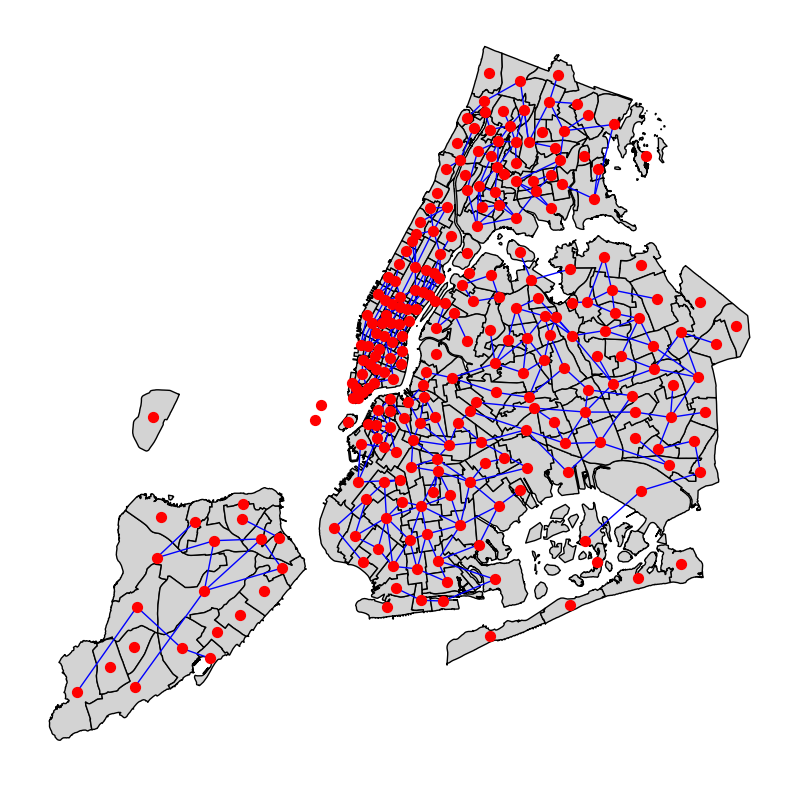

In [5]:
# Plot the map
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='lightgrey', edgecolor='black')

# Get the positions for the nodes
pos = {i: (geom.centroid.x, geom.centroid.y) for i, geom in enumerate(gdf.geometry)}

# Draw the graph on the map
nx.draw(G, pos, ax=ax, node_size=50, node_color='red', edge_color='blue')

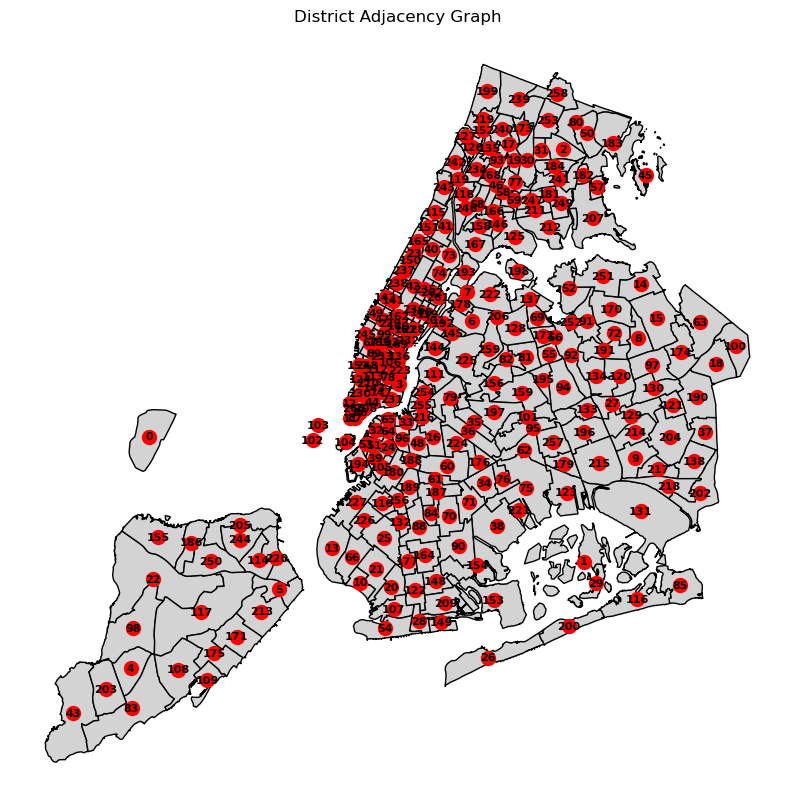

In [7]:
# Create a graph
G = nx.Graph()

# Add nodes with attributes from GeoDataFrame
for index, row in gdf.iterrows():
    G.add_node(index, **row.to_dict())

# Add edges based on adjacency with a small buffer to handle precision issues
buffer_size = 1  # Adjust this value as needed based on the scale of your map
for i, geom1 in enumerate(gdf.geometry):
    for j, geom2 in enumerate(gdf.geometry):
        if i < j and geom1.buffer(buffer_size).touches(geom2.buffer(buffer_size)):
            G.add_edge(i, j)

# Plot the map
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='lightgrey', edgecolor='black')

# Get the positions for the nodes
pos = {i: (geom.centroid.x, geom.centroid.y) for i, geom in enumerate(gdf.geometry)}

# Draw the graph on the map
nx.draw(G, pos, ax=ax, node_size=100, node_color='red', edge_color='blue', with_labels=True, font_weight='bold', font_size=8, node_shape='o')

# Show the plot
plt.title('District Adjacency Graph')
plt.show()

In [10]:
G.edges

EdgeView([])

NetworkXError: Node 263 has no position.

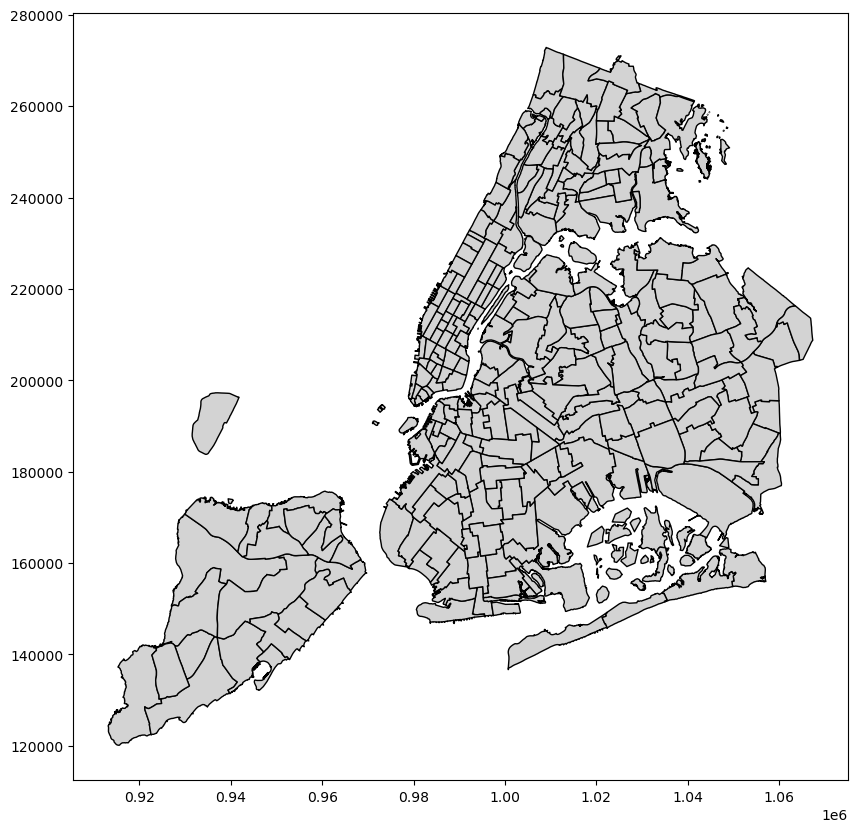

In [17]:
# Add a small buffer to ensure adjacency is detected correctly
buffer_size = 0.01  # Adjust based on your data

# Create a new GeoDataFrame with buffered geometries
gdf['geometry'] = gdf['geometry'].buffer(buffer_size)

# Spatial join to find neighbors
neighbors = gpd.sjoin(gdf, gdf, how="inner", predicate='intersects')

# Create a graph
G = nx.Graph()

# Add nodes with attributes from GeoDataFrame
for index, row in gdf.iterrows():
    G.add_node(index, **row.to_dict())

# Add edges based on spatial join results
for i, row in neighbors.iterrows():
    if row['OBJECTID_left'] != row['index_right']:
        G.add_edge(row['OBJECTID_left'], row['index_right'])

# Plot the map
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='lightgrey', edgecolor='black')

# Get the positions for the nodes
pos = {i: (geom.centroid.x, geom.centroid.y) for i, geom in enumerate(gdf.geometry)}

# Draw the graph on the map
nx.draw(G, pos, ax=ax, node_size=100, node_color='red', edge_color='blue', with_labels=True, font_weight='bold', font_size=8, node_shape='o')

# Show the plot
plt.title('District Adjacency Graph')
plt.show()

In [36]:
gdf.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [37]:
import libpysal
from libpysal.weights import Queen, Rook, KNN


w_rook = Rook.from_dataframe(gdf)
# ax = gdf.plot(edgecolor='grey', facecolor='w')
# f,ax = w_rook.plot(gdf, ax=ax, 
#         edge_kws=dict(color='r', linestyle=':', linewidth=1),
#         node_kws=dict(marker=''))
# ax.set_axis_off()

/tmp/ipykernel_544/1595342483.py:5: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_rook = Rook.from_dataframe(gdf)
/home/edr/mambaforge/envs/taxi-forecast/lib/python3.12/site-packages/libpysal/weights/contiguity.py:61: UserWarning: The weights matrix is not fully connected: 
 There are 263 disconnected components.
 There are 263 islands with ids: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,

In [38]:
w_rook.n

263

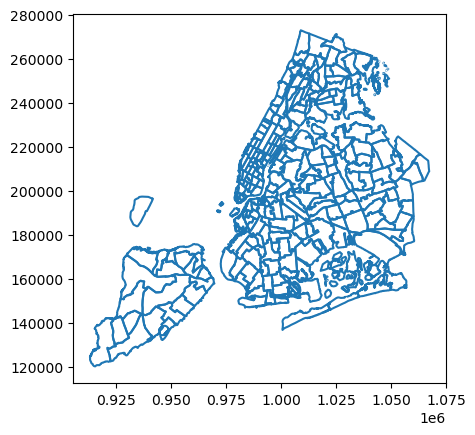

In [42]:
import matplotlib.pyplot as plt

# Plot the geometries to visually inspect overlaps or gaps
gdf.boundary.plot()
plt.show()

In [43]:
# apply a buffer and rerun rook
gdf['geometry'] = gdf['geometry'].buffer(0.01)
w_rook = Rook.from_dataframe(gdf)

/tmp/ipykernel_544/2361677126.py:3: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_rook = Rook.from_dataframe(gdf)
/home/edr/mambaforge/envs/taxi-forecast/lib/python3.12/site-packages/libpysal/weights/contiguity.py:61: UserWarning: The weights matrix is not fully connected: 
 There are 263 disconnected components.
 There are 263 islands with ids: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,

In [44]:
w_rook.n

263

In [45]:
# Simplify geometries (with a tolerance that makes sense for your data)
gdf['geometry'] = gdf['geometry'].simplify(tolerance=0.001)

# Create a new Rook weights object
w_rook = Rook.from_dataframe(gdf)
w_rook.n

/tmp/ipykernel_544/3574022112.py:5: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_rook = Rook.from_dataframe(gdf)
/home/edr/mambaforge/envs/taxi-forecast/lib/python3.12/site-packages/libpysal/weights/contiguity.py:61: UserWarning: The weights matrix is not fully connected: 
 There are 263 disconnected components.
 There are 263 islands with ids: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,

263

<Axes: >

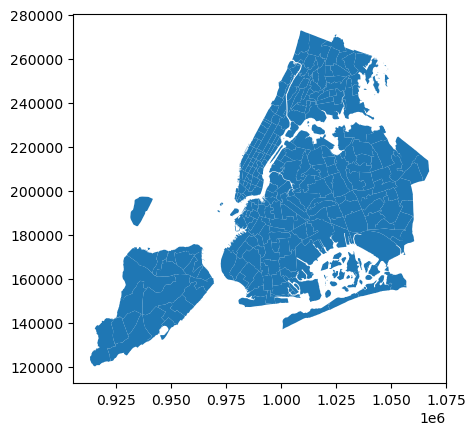

In [46]:
# Check for overlaps or gaps between polygons
gdf['geometry'].buffer(0).plot()

In [47]:
# Buffer polygons slightly and merge
buffer_distance = 0.1  # Adjust as necessary
gdf['geometry'] = gdf['geometry'].buffer(buffer_distance)

# Merge polygons
from shapely.ops import unary_union
merged_geometry = unary_union(gdf['geometry'])

# Create a new GeoDataFrame with merged geometries
merged_gdf = gpd.GeoDataFrame(geometry=[merged_geometry], crs=gdf.crs)

# Explode merged polygons into separate geometries if needed
gdf = gpd.GeoDataFrame(geometry=list(merged_geometry.geoms), crs=gdf.crs)

In [48]:
# Dissolve boundaries
gdf_dissolved = gdf.dissolve()


In [49]:
import numpy as np
from shapely.geometry import box

def snap_to_grid(geometry, grid_size):
    minx, miny, maxx, maxy = geometry.bounds
    snapped_geom = box(
        np.floor(minx / grid_size) * grid_size,
        np.floor(miny / grid_size) * grid_size,
        np.ceil(maxx / grid_size) * grid_size,
        np.ceil(maxy / grid_size) * grid_size
    )
    return snapped_geom.intersection(geometry)

grid_size = 1  # Adjust grid size as necessary
gdf['geometry'] = gdf['geometry'].apply(lambda geom: snap_to_grid(geom, grid_size))


In [50]:
from geopandas.tools import overlay

# Perform overlay to merge geometries
gdf_merged = overlay(gdf, gdf, how='union')


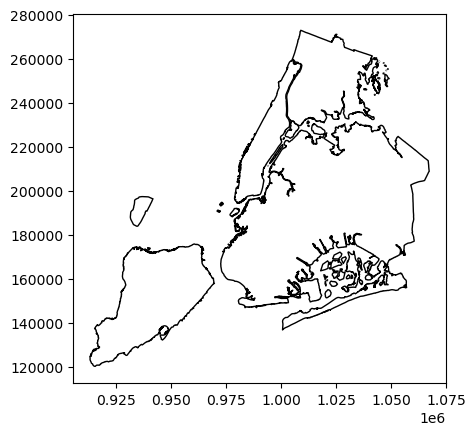

/tmp/ipykernel_544/1666981440.py:30: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  rook_weights = lp.weights.Rook.from_dataframe(gdf_merged)


District 0 has neighbors: []
District 1 has neighbors: []
District 2 has neighbors: []
District 3 has neighbors: []
District 4 has neighbors: []
District 5 has neighbors: []
District 6 has neighbors: []
District 7 has neighbors: []
District 8 has neighbors: []
District 9 has neighbors: []
District 10 has neighbors: []
District 11 has neighbors: []
District 12 has neighbors: []
District 13 has neighbors: []
District 14 has neighbors: []
District 15 has neighbors: []
District 16 has neighbors: []
District 17 has neighbors: []
District 18 has neighbors: []
District 19 has neighbors: []
District 20 has neighbors: []
District 21 has neighbors: []
District 22 has neighbors: []
District 23 has neighbors: []
District 24 has neighbors: []
District 25 has neighbors: []
District 26 has neighbors: []
District 27 has neighbors: []
District 28 has neighbors: []
District 29 has neighbors: []
District 30 has neighbors: []
District 31 has neighbors: []
District 32 has neighbors: []
District 33 has neig

/home/edr/mambaforge/envs/taxi-forecast/lib/python3.12/site-packages/libpysal/weights/contiguity.py:61: UserWarning: The weights matrix is not fully connected: 
 There are 62 disconnected components.
 There are 62 islands with ids: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61.
  W.__init__(self, neighbors, ids=ids, **kw)


In [51]:
import geopandas as gpd
from shapely.ops import unary_union

# Check and fix invalid geometries
gdf['geometry'] = gdf['geometry'].apply(lambda geom: geom.buffer(0) if not geom.is_valid else geom)

# Buffer polygons slightly to close gaps
buffer_distance = 0.1  # Adjust as necessary
gdf['geometry'] = gdf['geometry'].buffer(buffer_distance)

# Merge polygons
merged_geometry = unary_union(gdf['geometry'])

# Create a new GeoDataFrame with merged geometries
gdf_merged = gpd.GeoDataFrame(geometry=list(merged_geometry.geoms), crs=gdf.crs)

# Optionally, simplify geometries if needed
gdf_merged['geometry'] = gdf_merged['geometry'].simplify(tolerance=0.001)

# Plot to verify
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
gdf_merged.plot(ax=ax, edgecolor='black', facecolor='none')
plt.show()

# Compute Rook contiguity weights
import libpysal as lp

rook_weights = lp.weights.Rook.from_dataframe(gdf_merged)
rook_neighbors = rook_weights.neighbors

# Print the Rook neighbors
for key, value in rook_neighbors.items():
    print(f"District {key} has neighbors: {value}")

# Verify the number of neighbors
print("Number of neighbors found:", len(rook_neighbors))

In [57]:
import pysal as ps 
w = ps.queen_from_shapefile('../assets/tableau/taxi_zones/taxi_zones.shp')

AttributeError: module 'pysal' has no attribute 'queen_from_shapefile'

In [58]:
import libpysal
import geopandas

df = geopandas.read_file('../assets/tableau/taxi_zones/taxi_zones.shp')  # read shapefile

W = libpysal.weights.Queen.from_dataframe(df)  # generate spatial weights

G = W.to_networkx() # get networkx.Graph

/tmp/ipykernel_544/3494705534.py:6: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  W = libpysal.weights.Queen.from_dataframe(df)  # generate spatial weights
/home/edr/mambaforge/envs/taxi-forecast/lib/python3.12/site-packages/libpysal/weights/contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 10 disconnected components.
 There are 6 islands with ids: 0, 45, 102, 103, 104, 201.
  W.__init__(self, neighbors, ids=ids, **kw)


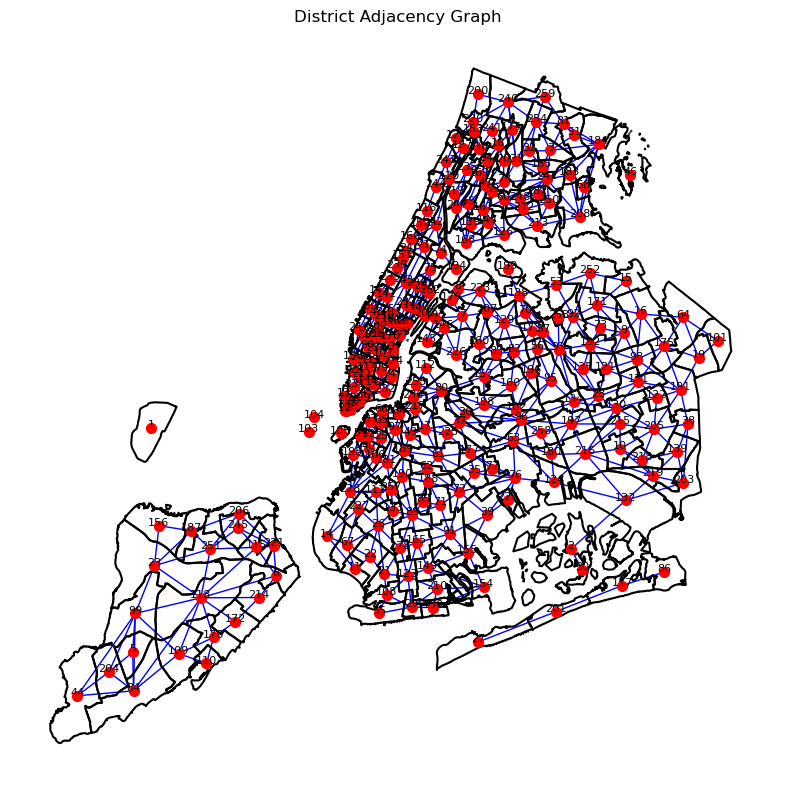

In [64]:
# plot the graph
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))

df.boundary.plot(ax=ax, color='black')
for i, row in df.iterrows():
    ax.text(row.geometry.centroid.x, row.geometry.centroid.y, s=row['OBJECTID'], fontsize=8, ha='center')

pos = {i: (geom.centroid.x, geom.centroid.y) for i, geom in enumerate(df.geometry)}
nx.draw(G, pos, ax=ax, node_size=50, node_color='red', edge_color='blue')

plt.title('District Adjacency Graph')
plt.show()
